# Prueba 1: Análisis de Sentimientos de Twitter

● Para realizar esta prueba debes haber estudiado previamente todo el material
disponibilizado correspondiente al módulo.
● Una vez terminada la prueba, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.
● Puntaje total: 10 puntos.
● Desarrollo prueba:
○ La prueba se debe desarrollar de manera Individual.
○ Para la realización de la prueba necesitarás apoyarte del archivo Apoyo
Prueba1.zip.

Contexto

A continuación se presenta un problema clásico en el análisis de texto: Extraer la polaridad
de sentimiento asociado a un texto.
Para esto, utilizaremos una base de datos provenientes de CrowdFlower que se entrega
como archivo adjunto para esta prueba bajo el nombre de training_tweets.csv .
Para descargar los datos puede ejecutar el siguiente código:

`wget`
`https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv`


El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si
un tweet tiene una polaridad positiva o negativa en cuanto al sentimiento que expresa.
Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso.
De esta manera evitaremos que los modelos aprendan información sobre el conjunto de
validación.

# Objetivos

Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:

* 1. Generar un análisis exploratorio sobre los datos contenidos en el DataFrame,
considerando palabras más comunes y distribución de las clases en el vector
objetivo.

* 2. Preprocesamiento de Texto:
● Para trabajar adecuadamente con texto, debemos preprocesar y posteriormente
representar cada oración como un conjunto de características.
● Para preprocesar los tweets, debemos transformarlos a lower case. Un problema
recurrente en el análisis de texto es la alta ocurrencia de palabras comunes. Se
recomienda eliminarlas mediante la declaración de stopwords. Para generar la
exclusión de stopwords, podemos utilizar la librería nltk (Natural Language ToolKit)
y descargar los stopwords con la siguiente instrucción.

`import nltk`
`nltk.download( 'stopwords' )`

* ● Puede refinar los atributos a capturar mediante el proceso de lemantización (la
reducción de variadas palabras con un tronco léxico común; ejemplo: Organización,
Organiza, y Organizado presentan organi_ como tronco léxico en común) o
Stemming (la reducción de una palabra a una expresión generalizable). Cabe
destacar que ésta última carece de análisis morfológico del lenguaje.
* ● Posterior a la refinación y preprocesamiento de las palabras, podemos representar
cada oración en una matriz (o corpus) que permitirá reflejar la cantidad de
ocurrencias de Wi palabra en un registro. Para ello, pueden hacer uso de las librerías
de preprocesamiento sklearn.feature_extraction.text.CountVectorizer o
sklearn.feature_extraction.text.TfidfVectorizer . De esta manera,
tendremos un conjunto de características es mediante la frecuencia de ocurrencia de
una palabra o término en el texto.

* 3. Preparación del vector objetivo y las matrices de entrenamiento y validación:
    ● Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello
    deberá generar la recodificación de cada una de las clases en una de las dos
    emociones:

|Original | Recodificación|
|---|---|
|'worry' | Negativa|
|'happiness' | Positiva|
|'sadness' | Negativa|
|'love' | Positiva|
|'surprise' | Positiva|
|'fun' | Positiva |
|'relief' | Positiva|
|'hate' | Negativa|
|'empty' | Negativa|
|'enthusiasm' | Positiva|
|'boredom' | Negativa|
|'anger' | Negativa|

* Si el tweet está asignado como neutral, clasifíquelo aleatoriamente entre positivo o negativo.

* 4. Entrenamiento de modelos:
    ○ En base a los modelos vistos en clase, implemente por lo menos 5. Para cada
    uno de ellos justifique la elección de hiper parámetros. Si implementa
    búsqueda de grilla para cada uno de ellos, defina el rango de valores a tomar
    en cada hiper parámetro.
    ○ Reporte el desempeño de cada modelo en las muestras de entrenamiento y
    validación. Comente sobre la capacidad de generalización de cada uno de
    ellos haciendo uso de los conceptos vistos en el curso.

* 5. Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que
    el modelo serializado debe ser posterior al fit , para poder ejecutar predict en los
    nuevos datos. 

# Evaluación

La siguiente rúbrica detalla los elementos que se evaluarán en el entregable final (Hito 3) de
la prueba, es decir, una vez que su trabajo esté completo:
* ● Notebook (9 Puntos) : El notebook debe ser un reporte con la estrategia analítica, explicando los siguientes puntos:
* ○ La definición de los requerimientos, la definición del vector objetivo, la definición de las métricas a utilizar. (1 Puntos)
* ○ Un análisis exploratorio (univariado y gráfico). Como mínimo, debe analizar el comportamiento del vector objetivo antes del preprocesamiento y posterior al procesamiento. (3 Puntos)
* ○ La estrategia de preprocesamiento/feature engineering. (3 Puntos)
* ○ La elección de los algoritmos a implementar, así como sus hiper parámetros.
* Un reporte sobre qué modelos se seleccionarán. (2 Puntos)
* ● Modelos serializados (1 Puntos) :
* ○ Los modelos deben estar serializados con la siguiente nomenclatura: nombre_grupo-modelo -1 y nombre_grupo-modelo -2 .
* La evaluación de los modelos serializados se realizará en función al desempeño predictivo del modelo en un conjunto de datos externos. La primera instancia es evaluar los dos modelos enviados a competencia por el grupo, preservando el mejor modelo para la competencia con los otros grupos. El segundo paso es rankear según el desempeño entre grupos. El alumno debe obtener un mínimo de 7 puntos para aprobar.

In [1]:
# Importacion de librerías
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import missingno as msno
import random

from nltk.stem.wordnet import WordNetLemmatizer

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
lmtzr = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/cris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cris/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Carga csv
df = pd.read_csv('training_tweets.csv').drop(columns=['Unnamed: 0'], axis = 1)

In [4]:
df.head()

,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry


In [5]:
# Cantidad de datos
df.shape

(30000, 2)

In [6]:
# Tipo de datos
df.dtypes

content      object
sentiment    object
dtype: object

<AxesSubplot:>

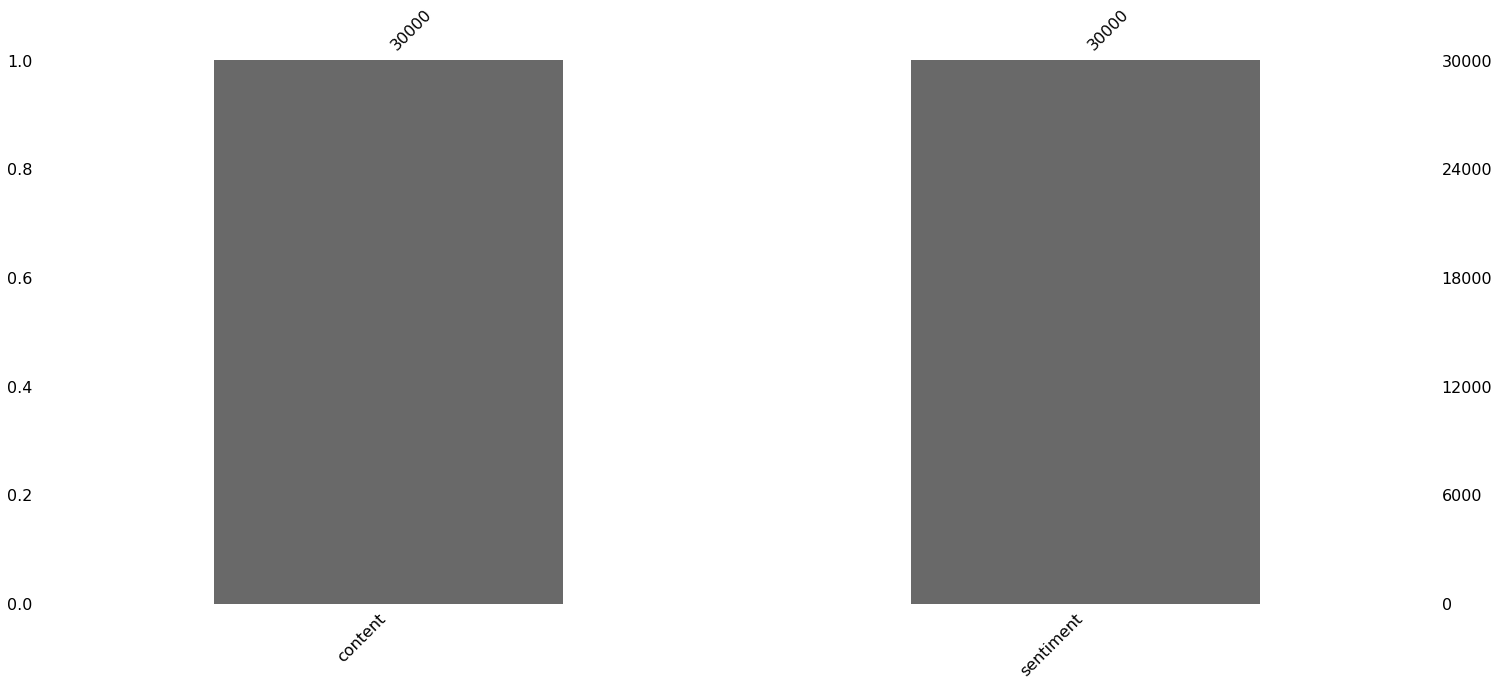

In [7]:
# Valores nulos
msno.bar(df)

No hay valores nulos en el csv

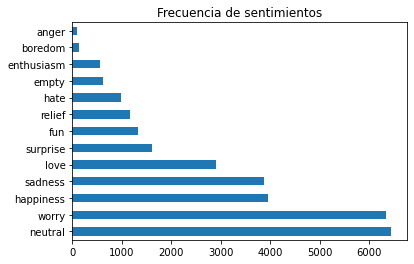

In [8]:
# Grafica de frecuencias por sentimientos
df['sentiment'].value_counts().plot.barh()
plt.title('Frecuencia de sentimientos')
plt.show()

La categoría neutral es la más frecuente, seguida por preocupacion(worry) y happiness(felicidad). De acuerdo a lo indicado en la recodificacion la data se encuentra balanceada entre sentimientos positivos y negativos.

In [9]:
# Reemplazo categorias(Positiva, Negativa, NaN)
df['sentiment']=df['sentiment'].replace(['happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm'], 'Positiva')
df['sentiment']=df['sentiment'].replace(['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger'], 'Negativa')
df['sentiment']=df['sentiment'].replace(['neutral'], np.nan)

In [10]:
# Reemplazo aleatorio NaN en Positiva y Negativa
mylist = ["Positiva", "Negativa"]
np.random.seed(4982)
df['sentiment'] = df['sentiment'].fillna(pd.Series(np.random.choice(mylist, size = len(df.index))))

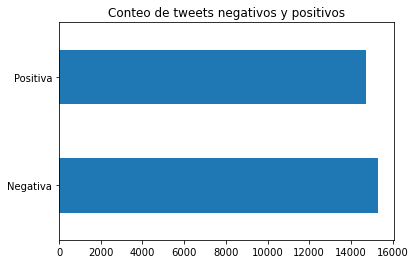

In [11]:
# Distribucion de datos 
df['sentiment'].value_counts().plot.barh()
plt.title('Conteo de tweets negativos y positivos')
plt.show()

In [12]:
# Se genera objeto con stopwords
stop = stopwords.words('english')

In [13]:
def clean_text(df, text_field):
    
    #se convierte el texto a minusculas
    df[text_field] = df[text_field].str.lower()
    
    #expansion de expresiones cortas del ingles 
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"can't", "can not", x))  
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"n\'t", " not", x))
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"\'re", " are", x))
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"\'m"," am", x))
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"\'s"," is", x))
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"\'ll"," will", x))
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"\'ve"," have", x))
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"\'t", " not", x))
    
    #se remueven @user, numeros, emoticones, urls, puntuaciones
    df[text_field] = df[text_field].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
    
    #se remueves stopwords y se acortan los espacios 
    df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    #Lematizacion de palabras
    df[text_field] = df[text_field].apply(lambda x: " ".join([lmtzr.lemmatize(word) for word in x.split()]))


In [14]:
clean_text(df, 'content')

In [15]:
# Se genera matriz y contador
count_vectorizer=CountVectorizer()
count_vectorizer_fit = count_vectorizer.fit_transform(df['content'])
words = count_vectorizer.get_feature_names()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [16]:
#Se genera dataframe para para mostrar las 100 palabras mas repetidas en la base de datos
df_top_words = pd.DataFrame(data= {'freq': words_freq}, index = words)
by_freq = df_top_words.sort_values('freq',ascending = False)

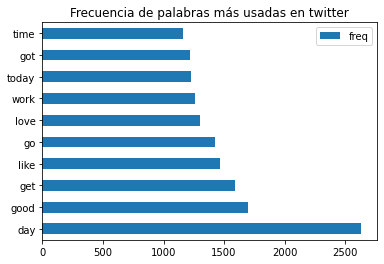

In [17]:
# Grafica 20 palabras mas usadas en Twitter
by_freq.head(10).plot.barh()
plt.title('Frecuencia de palabras más usadas en twitter')
plt.show()

In [18]:
X_features = count_vectorizer_fit
y_label = df['sentiment']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 4982)

In [21]:
import pickle

In [39]:
pickle.dump(X_train,open('X_train.sav','wb'))
pickle.dump(X_test,open('X_test.sav','wb'))
pickle.dump(y_train,open('y_train.sav','wb'))
pickle.dump(y_test,open('y_test.sav','wb'))

# Bayes Ingenuo

In [20]:
NaiveBclassifier = MultinomialNB()
model_bayes = NaiveBclassifier.fit(X_train,y_train)

In [21]:
yhat_nb = model_bayes.predict(X_test)
print(classification_report(y_test, yhat_nb))

              precision    recall  f1-score   support

    Negativa       0.68      0.69      0.69      3114
    Positiva       0.66      0.65      0.65      2886

    accuracy                           0.67      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.67      0.67      0.67      6000



In [22]:
#Se genera matriz de confusion
pd.crosstab(y_test, yhat_nb)

col_0,Negativa,Positiva
sentiment,,
Negativa,2163,951
Positiva,1024,1862


In [38]:
pickle.dump(model_bayes,open('model_bayes.sav','wb'))

# AdaBoost

In [23]:
param_grid_ada = {'learning_rate': [0.01, 0.1, 0.5] ,'n_estimators': [50,100, 500, 1000, 2000]}

In [24]:
ada_grid = GridSearchCV(AdaBoostClassifier(),
param_grid = param_grid_ada, cv=5, n_jobs= -1).fit(X_train, y_train)

In [25]:
#Se indica la mejor combinacion de hiperparametros para adaboost
ada_grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [26]:
ada = AdaBoostClassifier(learning_rate = 0.1, n_estimators=1000)
model_ada = ada.fit(X_train, y_train)

In [43]:
#Se reportan las metricas para adaboost
yhat_ada = model_ada.predict(X_test)
print(classification_report(y_test, y_hat_ada))

              precision    recall  f1-score   support

    Negativa       0.63      0.80      0.71      3114
    Positiva       0.70      0.50      0.58      2886

    accuracy                           0.66      6000
   macro avg       0.67      0.65      0.65      6000
weighted avg       0.67      0.66      0.65      6000



In [44]:
#Se genera matriz de confusion
pd.crosstab(y_test, yhat_ada)

col_0,Negativa,Positiva
sentiment,,
Negativa,2506,608
Positiva,1449,1437


In [40]:
pickle.dump(model_ada,open('model_ada.sav','wb'))

# GBoosting

In [28]:
param_grid_gb = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50,100, 500, 1000,2000],
                    'subsample': [0.1,0.5,0.9]}

In [29]:
gb_grid = GridSearchCV(GradientBoostingClassifier(),
param_grid = param_grid_gb,
cv=5, n_jobs = -1).fit(X_train, y_train)

In [32]:
gb_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.5}

In [33]:
model_g = GradientBoostingClassifier(learning_rate = 0.1, n_estimators= 1000, subsample = 0.5)
model_gb = model_g.fit(X_train,y_train)

In [46]:
yhat_gb = model_gb.predict(X_test)
print(classification_report(y_test, yhat_gb))

              precision    recall  f1-score   support

    Negativa       0.67      0.73      0.70      3114
    Positiva       0.67      0.61      0.64      2886

    accuracy                           0.67      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.67      0.67      0.67      6000



In [47]:
#Se genera matriz de confusion
pd.crosstab(y_test, yhat_gb)

col_0,Negativa,Positiva
sentiment,,
Negativa,2266,848
Positiva,1129,1757


In [41]:
pickle.dump(model_gb,open('model_gb.sav','wb'))

# Random Forest

In [49]:
param_grid_rf={'n_estimators' : range(1, 1200, 250),
                          'max_features':[None,'sqrt', 'log2'],
                          'max_depth':[None, 3, 10, 20],
                          'criterion'   : ['gini', 'entropy']}

In [50]:
rf_grid = GridSearchCV(RandomForestClassifier(),
param_grid = param_grid_rf,
cv=5, n_jobs = -1).fit(X_train, y_train)

In [51]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 1001}

In [53]:
model_rf = RandomForestClassifier(n_estimators= 1000, criterion = 'gini', max_depth = 20, max_features = 'sqrt')
model_forest = model_rf.fit(X_train,y_train)

In [54]:
yhat_rf = model_forest.predict(X_test)
print(classification_report(y_test, yhat_rf))

              precision    recall  f1-score   support

    Negativa       0.63      0.85      0.72      3114
    Positiva       0.74      0.47      0.58      2886

    accuracy                           0.67      6000
   macro avg       0.69      0.66      0.65      6000
weighted avg       0.68      0.67      0.65      6000



In [55]:
#Se genera matriz de confusion
pd.crosstab(y_test, yhat_rf)

col_0,Negativa,Positiva
sentiment,,
Negativa,2639,475
Positiva,1529,1357


In [56]:
pickle.dump(model_forest,open('model_rf.sav','wb'))

# Logistic Regression

In [22]:
param_grid_lg = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [35]:
lg_grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid_lg, cv=5, n_jobs = -1).fit(X_train, y_train)

In [36]:
lg_grid.best_params_

{'C': 0.1}

In [40]:
model_log = LogisticRegression(C =0.1, penalty = 'l2')
model_lg = model_log.fit(X_train,y_train)

In [41]:
yhat_log = model_lg.predict(X_test)
print(classification_report(y_test, yhat_log))

              precision    recall  f1-score   support

    Negativa       0.67      0.72      0.69      3114
    Positiva       0.67      0.62      0.64      2886

    accuracy                           0.67      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.67      0.67      0.67      6000



In [43]:
#Se genera matriz de confusion
pd.crosstab(y_test, yhat_log)

col_0,Negativa,Positiva
sentiment,,
Negativa,2231,883
Positiva,1102,1784


In [44]:
pickle.dump(model_log,open('model_log.sav','wb'))